In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [3]:
dfsb = pd.read_pickle('../TESTS/dataframe_DMD-Bloch4D_SB_trn4_tst20_2023-Oct-07_at_13-53.pkl')
dfsb.fillna(1)
dfsb.columns

Index(['Gamma', 'State', 'Distance', 'Time', 'gt', 'Fidelity_b4DMD',
       'Infidelity_b4DMD', 'Fidelity_b4a', 'Infidelity_b4a'],
      dtype='object')

In [4]:
dflme = pd.read_pickle('../TESTS/dataframe_DMD-Bloch4D_LME_trn4_tst20_2023-Oct-07_at_13-50.pkl')
dflme.fillna(1)
dflme.columns

Index(['Gamma', 'State', 'Distance', 'Time', 'gt', 'Fidelity_b4DMD',
       'Infidelity_b4DMD', 'Fidelity_b4a', 'Infidelity_b4a'],
      dtype='object')

In [5]:
def add_log_infidelities(df):

    df['Infidelity_DMD'] = 1 - df.Fidelity_b4DMD
    df['Infidelity_ANL'] = 1 - df.Fidelity_b4a

    df['LogInF_DMD'] = np.log10(np.abs(df['Infidelity_DMD']))
    df['LogInF_ANL'] = np.log10(np.abs(df['Infidelity_ANL']))

    df.loc[df["LogInF_DMD"] < -15, "LogInF_DMD"] = -15
    df.loc[df["LogInF_ANL"] < -15, "LogInF_ANL"] = -15

    df['Gamma'] = df['Gamma'].astype(float)
    
    return df  

In [6]:
dflme = add_log_infidelities(dflme)
dfsb = add_log_infidelities(dfsb)

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_21128/2966490857.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


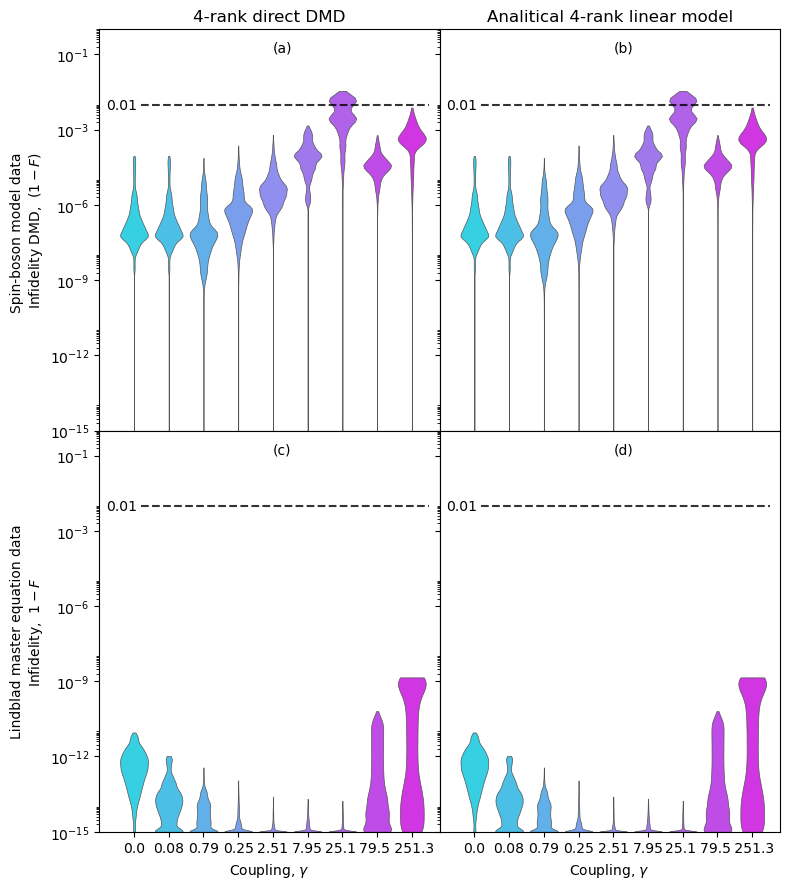

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(8,9), sharex = True, sharey = True)

sns.violinplot(ax=ax[0,0], data=dfsb, x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$', r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,0].set_ylim(ymin, ymax)

ax[0,0].set_ylabel('Spin-boson model data \n'+r'Infidelity DMD,  $(1-F)$')
ax[0,0].set_xlabel('')
ax[0,0].set_title('4-rank direct DMD')
ax[0,0].text(4, 0.1, '(a)')

ax[0,0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[1,0], data=dflme, x="Gamma", y='LogInF_DMD', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,0].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,0].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,0].set_ylim(ymin, ymax)
ax[1,0].set_xlim(0, 9.8)

ax[1,0].set_ylabel('Lindblad master equation data\n'+r'Infidelity,  $1-F$')
ax[1,0].set_xlabel(r'Coupling, $\gamma$')
ax[1,0].text(4, 0.1, '(c)')

xtick_range = np.arange(0, 9)
xtick_labels = ['0.0','0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[1,0].xaxis.set_ticks(xtick_range, xtick_labels)

ax[1,0].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,0].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[0,1], data=dfsb, x="Gamma", y='LogInF_ANL', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")
ymin = -15
ymax = 1.
    
ytick_range = np.arange(ymin, ymax, 3)
ytick_labels = [r'$10^{-15}$', r'$10^{-12}$', r'$10^{-9}$', r'$10^{-6}$', r'$10^{-3}$', r'$10^{-1}$']

ax[0,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[0,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[0,1].set_ylim(ymin, ymax)

ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_title('Analitical 4-rank linear model')
ax[0,1].text(4, 0.1, '(b)')

ax[0,1].hlines(y=np.log10(.01), xmin=0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[0,1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

sns.violinplot(ax=ax[1,1], data=dflme, x="Gamma", y='LogInF_ANL', cut = 0, # hue = "Method", split=True,
                    scale="width", palette ="cool", linewidth=0.5,
                    inner= None, bw="silverman")

ax[1,1].yaxis.set_ticks(ytick_range, ytick_labels)
ax[1,1].yaxis.set_ticks([np.log10(x) for p in ytick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

ax[1,1].set_ylim(ymin, ymax)
ax[1,1].set_xlim(-1, 8.8)

ax[1,1].set_ylabel('')
ax[1,1].set_xlabel(r'Coupling, $\gamma$')
ax[1,1].text(4, 0.1, '(d)')

xtick_range = np.arange(0, 9)
xtick_labels = [ '0.0', '0.08', '0.79', '0.25', '2.51', '7.95', '25.1 ', '79.5 ', ' 251.3']

ax[1,1].xaxis.set_ticks(xtick_range, xtick_labels)

ax[1,1].hlines(y=np.log10(.01), xmin= 0.2, xmax=8.5, colors='black', linestyles='--', alpha=0.8)
ax[1,1].text(-.8, np.log10(.01), '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0, wspace=.0)

fig.show()

In [ ]:
os.getcwd()

'/home/zah/github/OQSID-thesis/DMD_Bloch4D'

In [1]:
fig.savefig("DMD-Bloch4_LogInfid_rank-4_violin.pdf")

NameError: name 'fig' is not defined